<a href="https://colab.research.google.com/github/Armando1701/UTEC_Phyton_Jorge/blob/main/Proyecto_UTEC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import pandas as pd

In [5]:
# Read all sheets into a dictionary of DataFrames

all_sheets = pd.read_excel('data proyecto python.xlsx', sheet_name=None)

In [6]:
# Concatenate all DataFrames

combined_df = pd.concat(all_sheets.values(), ignore_index=True)

In [7]:
combined_df.head(5)

,Nro Tarea,Siguiente ubicaciÃ³n,Tipo de tarea,Estado,Fe y Hr Crea,Fe y Hr Modif,NÃºmero de selecciones,NÃºmero de movimientos,Usuario Modificac,UbicaciÃ³n actual,Numero de Ejec de CC,Nro OLA,Zona de destino,Movimientos de zona de tarea,Priorid,NÃºmero de carro,CC Tipo de creaciÃ³n,Numero de Grupo de Creacion,Usuario asignado
0,TSA005374542,NaN,REAB_BAJO_FLPN_ESTAN,Finalizada,2024-12-01 06:51:39,2024-12-01 06:52:29,2,2,dchipana,DROP-ESTANTERIA-PISO-2-0,NaN,NaN,NaN,4,20,NaN,NaN,NaN,NaN
1,TSA005374543,NaN,REAB_ALTO_FLPN_ESTAN,Finalizada,2024-12-01 06:51:47,2024-12-01 07:06:30,3,3,lquinteros,DROP-ESTANTERIA-0-0,NaN,NaN,NaN,4,20,NaN,NaN,NaN,NaN
2,TSA005374544,NaN,REAB_ALTO_FLPN_ESTAN,Finalizada,2024-12-01 06:53:58,2024-12-01 07:06:16,11,11,dchipana,DROP-ESTANTERIA-PISO-2-0,NaN,NaN,NaN,4,20,NaN,NaN,NaN,NaN
3,TSA005374545,NaN,REAB_ALTO_FLPN_ESTAN,Finalizada,2024-12-01 07:14:26,2024-12-01 07:22:58,3,3,lquinteros,DROP-ESTANTERIA-0-0,NaN,NaN,NaN,4,20,NaN,NaN,NaN,NaN
4,TSA005374546,NaN,REAB_BAJO_CASES,Finalizada,2024-12-01 08:08:32,2024-12-01 08:09:18,1,1,lquinteros,DROP-ESTANTERIA-0-0,NaN,NaN,NaN,4,20,NaN,NaN,NaN,NaN


In [8]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import io

In [11]:
# Convertir la columna 'fecha_finalizacion' a tipo datetime
combined_df['fecha_finalizacion'] = pd.to_datetime(combined_df['Fe y Hr Crea'])

In [12]:
# Filtrar solo las tareas que están en estado 'finalizado'
df_finalizadas = combined_df[combined_df['Estado'] == 'Finalizada'].copy() # .copy() para evitar SettingWithCopyWarning

In [13]:
# Contar la cantidad de tareas finalizadas por día
# Agrupar por la fecha de finalización y contar las ocurrencias
tareas_por_dia = df_finalizadas.groupby(df_finalizadas['fecha_finalizacion'].dt.date).size().reset_index(name='cantidad')

In [14]:
# Renombrar la columna de fecha para mayor claridad
tareas_por_dia = tareas_por_dia.rename(columns={'fecha_finalizacion': 'fecha'})

In [15]:
# Asegurarse de que la columna 'fecha' sea tipo datetime para un mejor manejo en el gráfico
tareas_por_dia['fecha'] = pd.to_datetime(tareas_por_dia['fecha'])

/tmp/ipython-input-16-1082975091.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='fecha', y='cantidad', data=tareas_por_dia, palette='viridis')


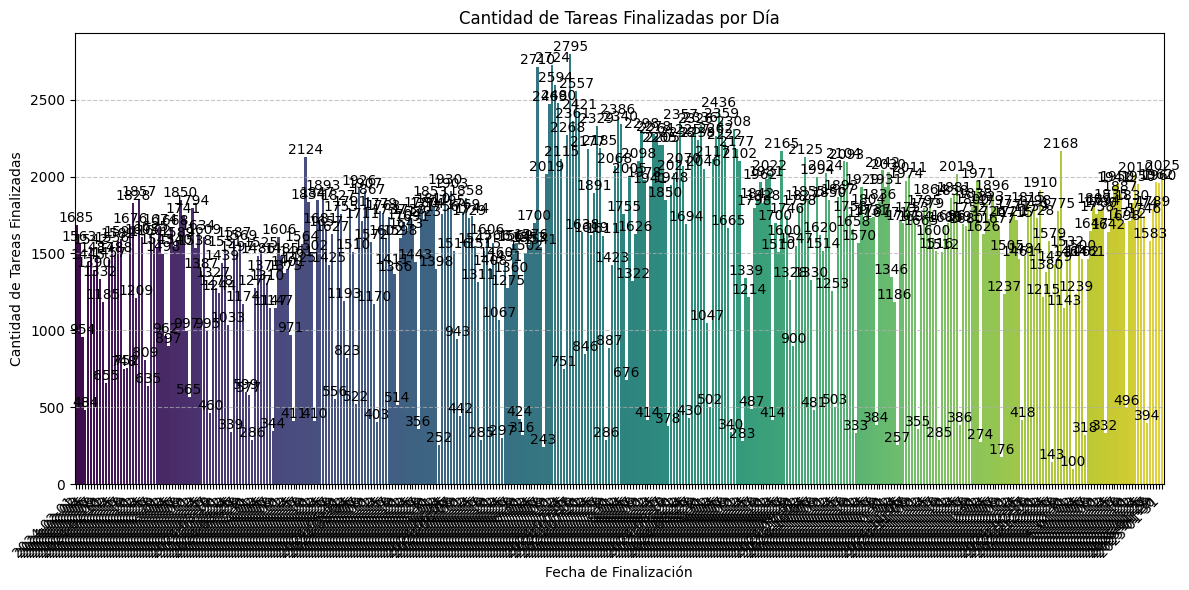

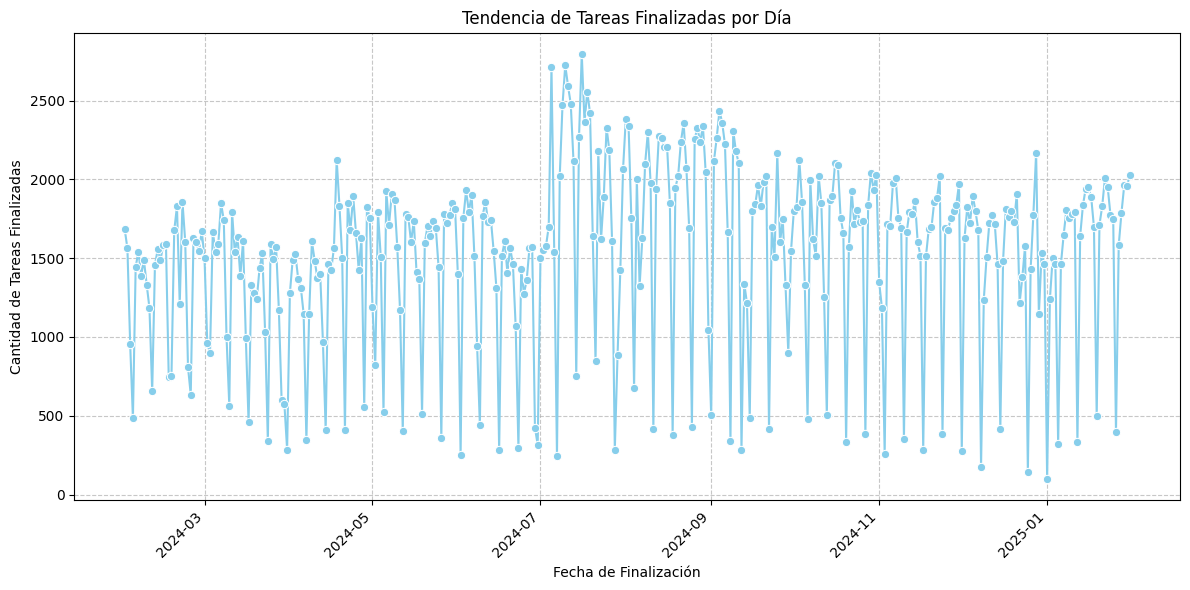

In [16]:
# 3. Creación del gráfico
plt.figure(figsize=(12, 6)) # Tamaño del gráfico

# Usar seaborn para un gráfico de barras
sns.barplot(x='fecha', y='cantidad', data=tareas_por_dia, palette='viridis')

# Añadir etiquetas y título
plt.xlabel('Fecha de Finalización')
plt.ylabel('Cantidad de Tareas Finalizadas')
plt.title('Cantidad de Tareas Finalizadas por Día')

# Rotar las etiquetas del eje X si hay muchas fechas para evitar superposición
plt.xticks(rotation=45, ha='right')

# Añadir los valores exactos encima de cada barra
for index, row in tareas_por_dia.iterrows():
    plt.text(index, row['cantidad'], str(row['cantidad']), color='black', ha='center', va='bottom')

plt.tight_layout() # Ajustar el diseño para que no se corten las etiquetas
plt.grid(axis='y', linestyle='--', alpha=0.7) # Añadir una cuadrícula en el eje Y
plt.show()

# 4. Opcional: Gráfico de líneas (útil para tendencias)
plt.figure(figsize=(12, 6))
sns.lineplot(x='fecha', y='cantidad', data=tareas_por_dia, marker='o', color='skyblue')
plt.xlabel('Fecha de Finalización')
plt.ylabel('Cantidad de Tareas Finalizadas')
plt.title('Tendencia de Tareas Finalizadas por Día')
plt.xticks(rotation=45, ha='right')
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

In [17]:
# Contar la cantidad de tareas finalizadas por día
# Agrupar por la fecha de finalización y contar las ocurrencias
tareas_por_mes = df_finalizadas.groupby(df_finalizadas['fecha_finalizacion'].dt.to_period('M')).size().reset_index(name='cantidad')

In [18]:
# Asegurarse de que la columna 'fecha_finalizacion' sea de tipo datetime para un mejor manejo en el gráfico
tareas_por_mes['fecha_finalizacion'] = tareas_por_mes['fecha_finalizacion'].dt.to_timestamp()

In [19]:
# Opcional: Renombrar la columna para mayor claridad si se desea
tareas_por_mes = tareas_por_mes.rename(columns={'fecha_finalizacion': 'mes'})

/tmp/ipython-input-20-1149816305.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='mes', y='cantidad', data=tareas_por_mes, palette='magma') # Cambié la paleta para variar


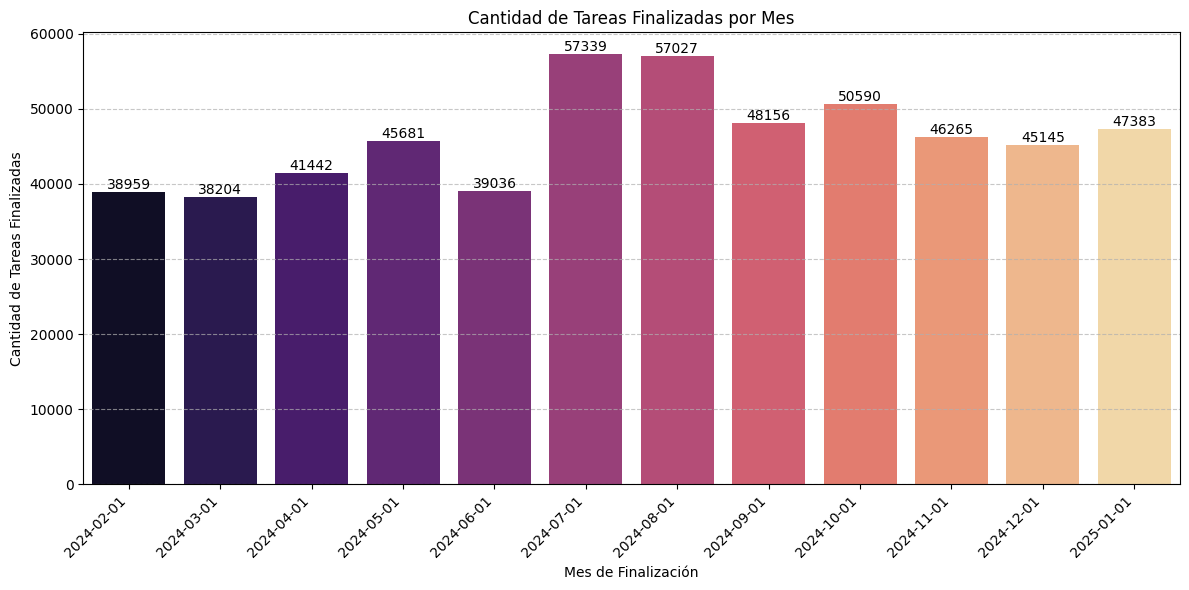

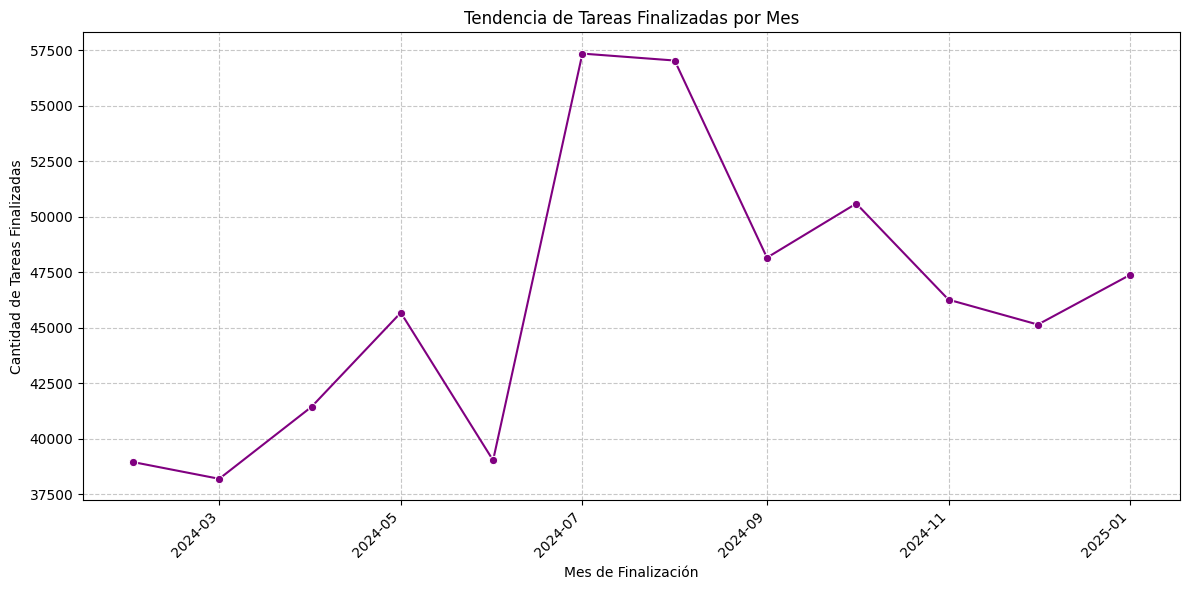

In [20]:
# 3. Creación del gráfico
plt.figure(figsize=(12, 6))

sns.barplot(x='mes', y='cantidad', data=tareas_por_mes, palette='magma') # Cambié la paleta para variar

plt.xlabel('Mes de Finalización')
plt.ylabel('Cantidad de Tareas Finalizadas')
plt.title('Cantidad de Tareas Finalizadas por Mes')

# Rotar las etiquetas del eje X si es necesario, aunque para meses suele ser menos crítico
plt.xticks(rotation=45, ha='right')

# Añadir los valores exactos encima de cada barra
for index, row in tareas_por_mes.iterrows():
    plt.text(index, row['cantidad'], str(row['cantidad']), color='black', ha='center', va='bottom')

plt.tight_layout()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# Opcional: Gráfico de líneas (útil para tendencias)
plt.figure(figsize=(12, 6))
sns.lineplot(x='mes', y='cantidad', data=tareas_por_mes, marker='o', color='purple')
plt.xlabel('Mes de Finalización')
plt.ylabel('Cantidad de Tareas Finalizadas')
plt.title('Tendencia de Tareas Finalizadas por Mes')
plt.xticks(rotation=45, ha='right')
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

In [21]:
w = tareas_por_mes['mes']
z = tareas_por_mes['cantidad']

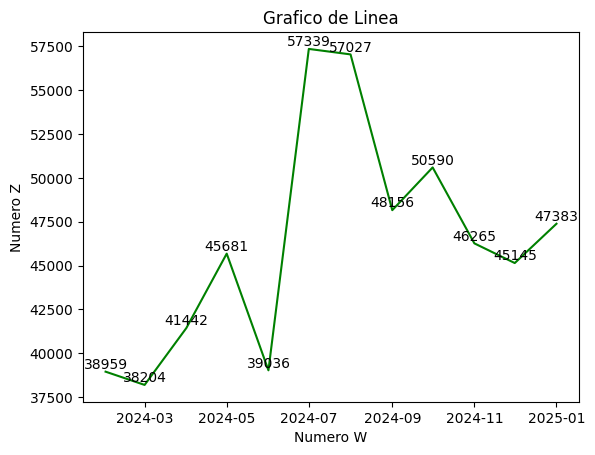

In [22]:
plt.plot(w, z, 'g')
plt.xlabel('Numero W')
plt.ylabel('Numero Z')
plt.title('Grafico de Linea')

# Add values inside the line
for i, (x_val, y_val) in enumerate(zip(w, z)):
    plt.text(x_val, y_val, f'{y_val}', ha='center', va='bottom', color='black')

In [24]:
pip install pandas

In [26]:
import pandas as pd

In [28]:
# Obtener valores únicos de 'Tipo de tarea'
tipo_tarea_unique = combined_df["Tipo de tarea"].unique().tolist()
print("\nValores únicos de 'Tipo de tarea':", tipo_tarea_unique)


Valores únicos de 'Tipo de tarea': ['REAB_BAJO_FLPN_ESTAN', 'REAB_ALTO_FLPN_ESTAN', 'REAB_BAJO_CASES', 'Picking Cubicado CD11', 'CC Location LPN Scan', 'REAB_ALTO_FLPN', 'REAB_BAJO_FLPN', 'PICK_CUB_ACTIV_GENERAL', 'REAB_ALTO_CASES', 'PICK_CUB_RESERVA_GENERAL', 'REAB_BAJO_PALLET', 'REAB_ALTO_PALLET', 'PANAL_REAB_BAJO_PALLET', 'PANAL_REAB_ALTO_PALLET', 'FECHA_CORTA_ESTAN_CPE', 'FECHA_CORTA_ESTAN_SP', 'PLT_NA_TRASLADO_CD12', 'NA_TRASLADO_CD12', 'PLT_NB_TRASLADO_CD12', 'NB_TRASLADO_CD12', 'PLT_NB_TRASLADO_CD06', 'PLT_NA_TRASLADO_CD06', 'NA_TRASLADO_CD06', 'NB_TRASLADO_CD06', 'REAB_BAJO_FLPN_MM', 'FECHA_CORTA_ALTO_SP', 'FECHA_CORTA_BAJO_SP', 'FECHA_CORTA_ALTO_CPE', 'FECHA_CORTA_BAJO_CPE', 'FECHA_CORTA_ALTO_CP', 'FECHA_CORTA_BAJO_CP', 'FECHA_CORTA_KMNL_CPE', 'FECHA_CORTA_MZ_CPE', 'FECHA_CORTA_ESTAN_CP', 'FECHA_CORTA_SDA_CP', 'FECHA_CORTA_KMNL_CP', 'FECHA_CORTA_MZ_SP', 'Pick Cart', 'FECHA_CORTA_KMNL_SP', 'LIMPIEZA VIDRIO', 'Cases Replenishement', 'FECHA_CORTA_SDA_CPE', 'FECHA_CORTA_MZ_CP', '

In [30]:
# Extraer el mes como número (1-12)
combined_df['Mes'] = combined_df['fecha_finalizacion'].dt.month

# Opcional: Extraer el año para agrupar por año y mes
combined_df['Anio'] = combined_df['fecha_finalizacion'].dt.year

In [39]:
# Combinar año y mes para una clave de agrupación única y legible
# Puedes usar un formato como 'YYYY-MM'
df_finalizadas['Anio_Mes'] = combined_df['fecha_finalizacion'].dt.to_period('M')

In [41]:
# Contamos la cantidad de cada 'Tipo_Tarea' por 'Anio_Mes'.
# Usamos .size() porque estamos contando las ocurrencias de cada combinación única.
conteo_por_mes_tarea = df_finalizadas.groupby(['Anio_Mes', 'Tipo de tarea']).size().reset_index(name='Cantidad')

# Convertimos 'Anio_Mes' a string para una mejor visualización en el eje X del gráfico
conteo_por_mes_tarea['Anio_Mes'] = conteo_por_mes_tarea['Anio_Mes'].astype(str)

In [44]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

/tmp/ipython-input-46-2830006074.py:29: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


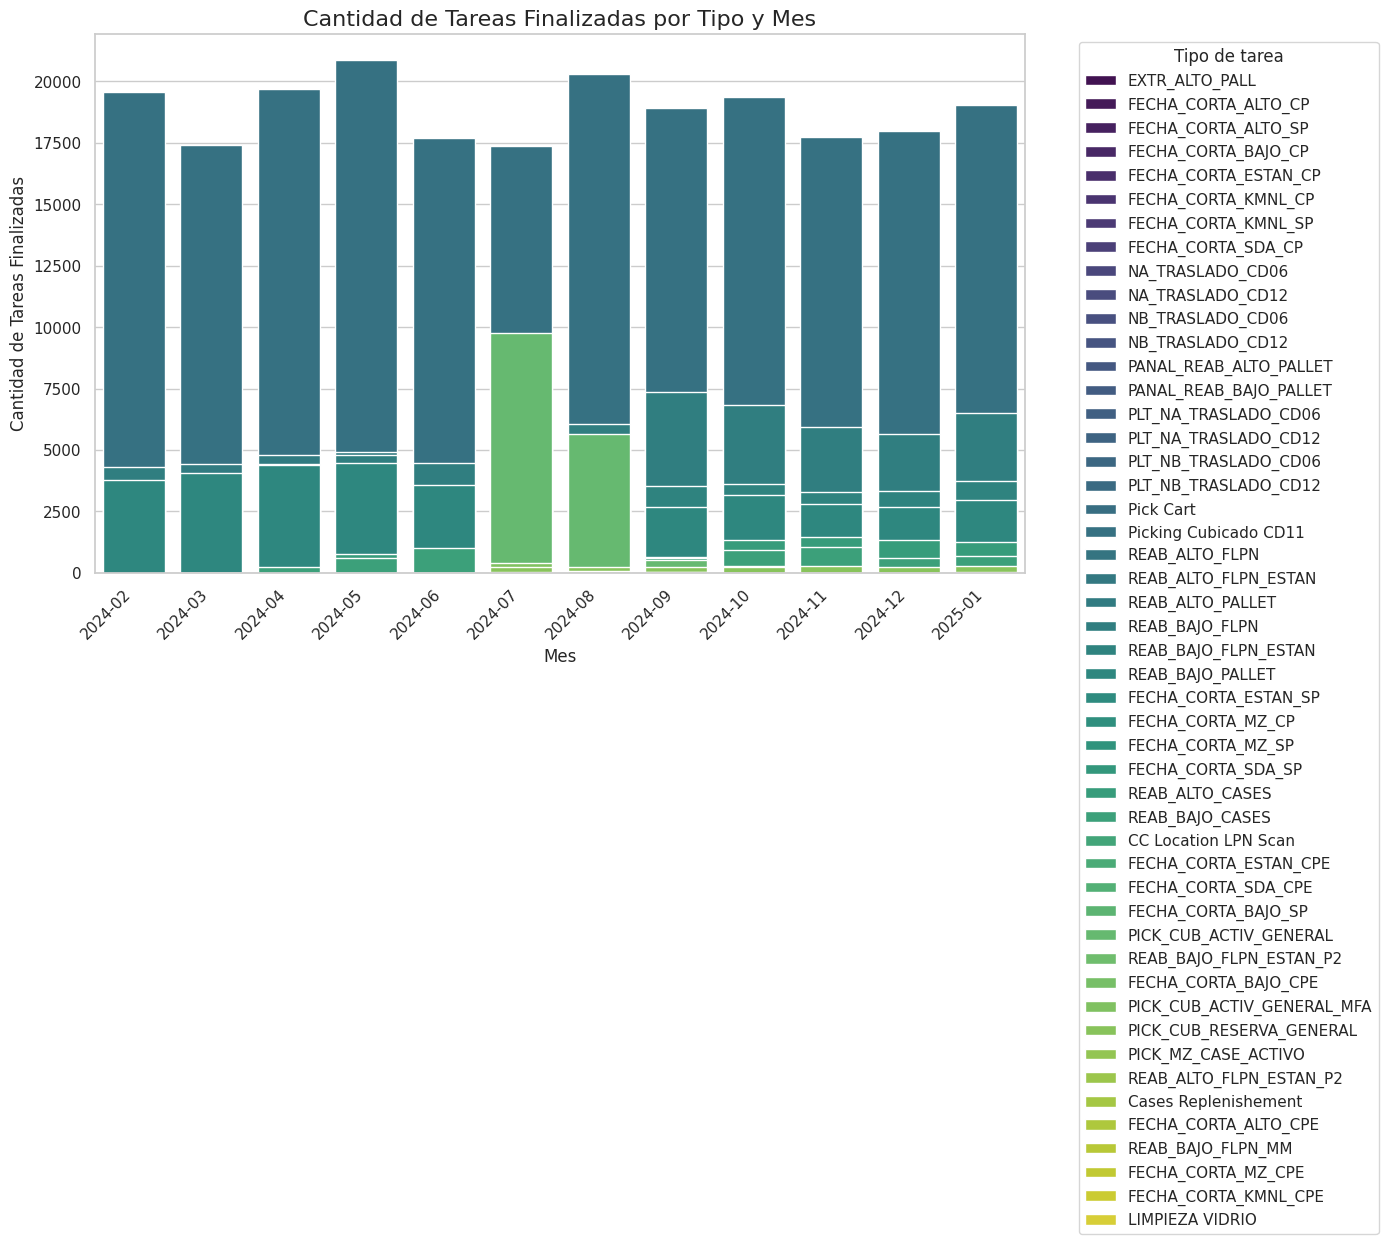

In [46]:
# Configuramos el estilo de seaborn para un gráfico más estético
sns.set_theme(style="whitegrid")

# Creamos la figura y los ejes para el gráfico
plt.figure(figsize=(12, 7)) # Ajusta el tamaño del gráfico según tus preferencias

# Usamos seaborn.barplot para crear el gráfico de barras apiladas
sns.barplot(
    x='Anio_Mes',             # Eje X: los meses
    y='Cantidad',             # Eje Y: la cantidad de tareas
    hue='Tipo de tarea',         # Coloreamos y segmentamos las barras por el tipo de tarea
    data=conteo_por_mes_tarea, # Nuestro DataFrame con los datos agrupados
    dodge=False,              # ¡Importante! Esto asegura que las barras se apilen y no se separen
    palette='viridis'         # Elegimos una paleta de colores para las diferentes tareas
)

# Añadimos un título y etiquetas a los ejes
plt.title('Cantidad de Tareas Finalizadas por Tipo y Mes', fontsize=16)
plt.xlabel('Mes', fontsize=12)
plt.ylabel('Cantidad de Tareas Finalizadas', fontsize=12)

# Rotamos las etiquetas del eje X para que sean más legibles si hay muchos meses
plt.xticks(rotation=45, ha='right')

# Movemos la leyenda fuera del área del gráfico para evitar que bloquee las barras
plt.legend(title='Tipo de tarea', bbox_to_anchor=(1.05, 1), loc='upper left')

# Ajustamos el diseño para que todo quepa correctamente
plt.tight_layout()

# Mostramos el gráfico
plt.show()

In [47]:
# 1. Crear una nueva columna para la categoría de tarea agrupada
combined_df['Categoria_Tarea'] = combined_df['Tipo de tarea']

# 2. Aplicar la lógica de agrupación
# Usamos .loc para modificar las filas que cumplen la condición
combined_df.loc[combined_df['Tipo de tarea'].str.startswith('REAB_') |
       combined_df['Tipo de tarea'].str.startswith('PANAL_REAB_'), 'Categoria_Tarea'] = 'Reabastecimiento'

In [49]:
# Opcional: Podrías crear más categorías aquí si lo necesitas
combined_df.loc[combined_df['Tipo de tarea'].str.contains('PICK', case=False), 'Categoria_Tarea'] = 'Picking'
combined_df.loc[combined_df['Tipo de tarea'].str.contains('TRASLADO', case=False), 'Categoria_Tarea'] = 'Traslado Interno'
combined_df.loc[combined_df['Tipo de tarea'].str.contains('FECHA_CORTA', case=False), 'Categoria_Tarea'] = 'Gestión Fecha Corta'

In [51]:
import pandas as pd


# Dictionary to grupo tareas to Procesos
sub_procesos_fp = {
    'REAB_BAJO_FLPN_ESTAN': 'Reabastecimiento Caja',
    'REAB_ALTO_FLPN_ESTAN': 'Reabastecimiento Caja',
    'REAB_BAJO_CASES': 'Reabastecimiento Caja',
    'REAB_ALTO_FLPN': 'Reabastecimiento Caja',
    'REAB_BAJO_FLPN': 'Reabastecimiento Caja',
    'REAB_ALTO_CASES': 'Reabastecimiento Caja',
    'REAB_BAJO_PALLET': 'Reabastecimiento Pallet',
    'REAB_ALTO_PALLET': 'Reabastecimiento Pallet',
    'PANAL_REAB_BAJO_PALLET': 'Reabastecimiento Pallet',
    'PANAL_REAB_ALTO_PALLET': 'Reabastecimiento Pallet',
    'REAB_BAJO_FLPN_MM': 'Reabastecimiento Cajas',
    'Cases Replenishement': 'Reabastecimiento Cajas',
    'REAB_BAJO_FLPN_ESTAN_P2': 'Reabastecimiento Cajas',
    'REAB_ALTO_FLPN_ESTAN_P2': 'Reabastecimiento Cajas',
    'Picking Cubicado CD11': 'Picking Unidades',
    'PICK_CUB_ACTIV_GENERAL': 'Picking Unidades',
    'PICK_CUB_RESERVA_GENERAL': 'Picking Unidades',
    'PICK_MZ_CASE_ACTIVO': 'Picking Cajas',
    'PICK_CUB_ACTIV_GENERAL_X': 'Picking Unidades',
    'PICK_CUB_ACTIV_GENERAL_MFA': 'Picking Unidades',
    'PICK_ACTIVE_UN_REFRIG': 'Picking Refrigerado',
    'CC Location LPN Scan': 'Otros',
    'FECHA_CORTA_ESTAN_CPE': 'Gestion Vencimiento Corto',
    'FECHA_CORTA_ESTAN_SP': 'Gestion Vencimiento Corto',
    'FECHA_CORTA_ALTO_SP': 'Gestion Vencimiento Corto',
    'FECHA_CORTA_BAJO_SP': 'Gestion Vencimiento Corto',
    'FECHA_CORTA_ALTO_CPE': 'Gestion Vencimiento Corto',
    'FECHA_CORTA_BAJO_CPE': 'Gestion Vencimiento Corto',
    'FECHA_CORTA_ALTO_CP': 'Gestion Vencimiento Corto',
    'FECHA_CORTA_BAJO_CP': 'Gestion Vencimiento Corto',
    'FECHA_CORTA_KMNL_CPE': 'Gestion Vencimiento Corto',
    'FECHA_CORTA_MZ_CPE': 'Gestion Vencimiento Corto',
    'FECHA_CORTA_ESTAN_CP': 'Gestion Vencimiento Corto',
    'FECHA_CORTA_SDA_CP': 'Gestion Vencimiento Corto',
    'FECHA_CORTA_KMNL_CP': 'Gestion Vencimiento Corto',
    'FECHA_CORTA_MZ_SP': 'Gestion Vencimiento Corto',
    'Pick Cart': 'Picking Unidades',
    'FECHA_CORTA_KMNL_SP': 'Gestion Vencimiento Corto',
    'FECHA_CORTA_SDA_CPE': 'Gestion Vencimiento Corto',
    'FECHA_CORTA_MZ_CP': 'Gestion Vencimiento Corto',
    'FECHA_CORTA_SDA_SP': 'Gestion Vencimiento Corto',
    'PLT_NA_TRASLADO_CD12': 'Traslados Internos',
    'NA_TRASLADO_CD12': 'Traslados Internos',
    'PLT_NB_TRASLADO_CD12': 'Traslados Internos',
    'NB_TRASLADO_CD12': 'Traslados Internos',
    'PLT_NB_TRASLADO_CD06': 'Traslados Internos',
    'PLT_NA_TRASLADO_CD06': 'Traslados Internos',
    'NA_TRASLADO_CD06': 'Traslados Internos',
    'NB_TRASLADO_CD06': 'Traslados Internos',
    'LIMPIEZA VIDRIO': 'Otros',
    'EXTR_ALTO_PALL': 'Otros'
}

# Create new column using map
combined_df['Grupos_subprocesos'] = combined_df['Tipo de tarea'].map(sub_procesos_fp)

print(combined_df[['Tipo de tarea', 'Grupos_subprocesos']])

                Tipo de tarea     Grupos_subprocesos
0        REAB_BAJO_FLPN_ESTAN  Reabastecimiento Caja
1        REAB_ALTO_FLPN_ESTAN  Reabastecimiento Caja
2        REAB_ALTO_FLPN_ESTAN  Reabastecimiento Caja
3        REAB_ALTO_FLPN_ESTAN  Reabastecimiento Caja
4             REAB_BAJO_CASES  Reabastecimiento Caja
...                       ...                    ...
722436  Picking Cubicado CD11       Picking Unidades
722437  Picking Cubicado CD11       Picking Unidades
722438  Picking Cubicado CD11       Picking Unidades
722439   REAB_BAJO_FLPN_ESTAN  Reabastecimiento Caja
722440   REAB_BAJO_FLPN_ESTAN  Reabastecimiento Caja

[722441 rows x 2 columns]
